In [ ]:
#imports
import pandas as pd
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from google.colab import files
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten, GlobalAveragePooling1D
from tensorflow.keras.models import Model

In [ ]:
uploaded = files.upload()

Saving U06_Acc_TimeD_FDay.csv to U06_Acc_TimeD_FDay.csv
Saving U06_Acc_TimeD_FreqD_FDay.csv to U06_Acc_TimeD_FreqD_FDay.csv
Saving U06_Acc_TimeD_FreqD_MDay.csv to U06_Acc_TimeD_FreqD_MDay.csv
Saving U06_Acc_TimeD_MDay.csv to U06_Acc_TimeD_MDay.csv
Saving U07_Acc_FreqD_FDay.csv to U07_Acc_FreqD_FDay.csv
Saving U07_Acc_FreqD_MDay.csv to U07_Acc_FreqD_MDay.csv
Saving U07_Acc_TimeD_FDay.csv to U07_Acc_TimeD_FDay.csv
Saving U07_Acc_TimeD_FreqD_FDay.csv to U07_Acc_TimeD_FreqD_FDay.csv
Saving U07_Acc_TimeD_FreqD_MDay.csv to U07_Acc_TimeD_FreqD_MDay.csv
Saving U07_Acc_TimeD_MDay.csv to U07_Acc_TimeD_MDay.csv
Saving U08_Acc_FreqD_FDay.csv to U08_Acc_FreqD_FDay.csv
Saving U08_Acc_FreqD_MDay.csv to U08_Acc_FreqD_MDay.csv
Saving U08_Acc_TimeD_FDay.csv to U08_Acc_TimeD_FDay.csv
Saving U08_Acc_TimeD_FreqD_FDay.csv to U08_Acc_TimeD_FreqD_FDay.csv
Saving U08_Acc_TimeD_FreqD_MDay.csv to U08_Acc_TimeD_FreqD_MDay.csv
Saving U08_Acc_TimeD_MDay.csv to U08_Acc_TimeD_MDay.csv
Saving U09_Acc_FreqD_FDay.csv to

In [ ]:
#spliting imported files
uploaded_train_FD = [
    "U01_Acc_FreqD_FDay.csv",
    "U02_Acc_FreqD_FDay.csv",
    "U03_Acc_FreqD_FDay.csv",
    "U04_Acc_FreqD_FDay.csv",
    "U05_Acc_FreqD_FDay.csv",
    "U06_Acc_FreqD_FDay.csv",
    "U07_Acc_FreqD_FDay.csv",
    "U08_Acc_FreqD_FDay.csv",
    "U09_Acc_FreqD_FDay.csv"
    # "U10_Acc_FreqD_FDay.csv"
]
uploaded_train_TD=[
    "U01_Acc_TimeD_FDay.csv",
    "U02_Acc_TimeD_FDay.csv",
    "U03_Acc_TimeD_FDay.csv",
    "U04_Acc_TimeD_FDay.csv",
    "U05_Acc_TimeD_FDay.csv",
    "U06_Acc_TimeD_FDay.csv",
    "U07_Acc_TimeD_FDay.csv",
    "U08_Acc_TimeD_FDay.csv",
    "U09_Acc_TimeD_FDay.csv"
    # "U10_Acc_TimeD_FDay.csv"
]
uploaded_test_FD = [
    "U01_Acc_FreqD_MDay.csv",
    "U02_Acc_FreqD_MDay.csv",
    "U03_Acc_FreqD_MDay.csv",
    "U04_Acc_FreqD_MDay.csv",
    "U05_Acc_FreqD_MDay.csv",
    "U06_Acc_FreqD_MDay.csv",
    "U07_Acc_FreqD_MDay.csv",
    "U08_Acc_FreqD_MDay.csv",
    "U09_Acc_FreqD_MDay.csv",
    # "U10_Acc_FreqD_MDay.csv"
]
uploaded_test_TD = [
    "U01_Acc_TimeD_MDay.csv",
    "U02_Acc_TimeD_MDay.csv",
    "U03_Acc_TimeD_MDay.csv",
    "U04_Acc_TimeD_MDay.csv",
    "U05_Acc_TimeD_MDay.csv",
    "U06_Acc_TimeD_MDay.csv",
    "U07_Acc_TimeD_MDay.csv",
    "U08_Acc_TimeD_MDay.csv",
    "U09_Acc_TimeD_MDay.csv",
    # "U10_Acc_TimeD_MDay.csv"
]


In [ ]:
global_pooling = tf.keras.layers.GlobalAveragePooling1D()

train_FreqData = []
train_TimeData = []
val_FreqData = []
val_TimeData = []
test_FreqData = []
test_TimeData = []

for f in uploaded_train_FD:
    df = pd.read_csv(f)

    train_df = df.iloc[:20]
    val_df = df.iloc[20:]

    train_tensor = tf.convert_to_tensor(train_df, dtype=tf.float32)
    train_tensor = tf.expand_dims(train_tensor, axis=0)
    train_pooled = global_pooling(train_tensor)
    train_FreqData.append(train_pooled)

    val_tensor = tf.convert_to_tensor(val_df, dtype=tf.float32)
    val_tensor = tf.expand_dims(val_tensor, axis=0)
    val_pooled = global_pooling(val_tensor)
    val_FreqData.append(val_pooled)

for f in uploaded_train_TD:

    df = pd.read_csv(f)

    train_df = df.iloc[:20]
    val_df = df.iloc[20:]

    train_tensor = tf.convert_to_tensor(train_df, dtype=tf.float32)
    train_tensor = tf.expand_dims(train_tensor, axis=0)
    train_pooled = global_pooling(train_tensor)
    train_TimeData.append(train_pooled)

    val_tensor = tf.convert_to_tensor(val_df, dtype=tf.float32)
    val_tensor = tf.expand_dims(val_tensor, axis=0)
    val_pooled = global_pooling(val_tensor)
    val_TimeData.append(val_pooled)

for f in uploaded_test_FD:
    df = pd.read_csv(f)
    data_tensor = tf.convert_to_tensor(df, dtype=tf.float32)
    data_tensor = tf.expand_dims(data_tensor, axis=0)
    pooled = global_pooling(data_tensor)
    test_FreqData.append(pooled)

for f in uploaded_test_TD:
    df = pd.read_csv(f)
    data_tensor = tf.convert_to_tensor(df, dtype=tf.float32)
    data_tensor = tf.expand_dims(data_tensor, axis=0)
    pooled = global_pooling(data_tensor)
    test_TimeData.append(pooled)

trainF = np.stack(train_FreqData)
trainT = np.stack(train_TimeData)
valF = np.stack(val_FreqData)
valT = np.stack(val_TimeData)
testF = np.stack(test_FreqData)
testT = np.stack(test_TimeData)

xtrain_FD = tf.convert_to_tensor(trainF)
xtrain_TD = tf.convert_to_tensor(trainT)
xval_FD = tf.convert_to_tensor(valF)
xval_TD = tf.convert_to_tensor(valT)
xtest_FD = tf.convert_to_tensor(testF)
xtest_TD = tf.convert_to_tensor(testT)


In [ ]:
xtrain_FD_squeezed = tf.squeeze(xtrain_FD, axis=1)
xtest_FD_squeezed= tf.squeeze(xtest_FD, axis=1)
xval_FD_squeezed = tf.squeeze(xval_FD, axis=1)
xval_TD_squeezed = tf.squeeze(xval_TD, axis=1)
xtrain_TD_squeezed = tf.squeeze(xtrain_TD, axis=1)
xtest_TD_squeezed = tf.squeeze(xtest_TD, axis=1)

In [ ]:
xtest_FD_squeezed.shape

TensorShape([10, 43])

In [ ]:
ytrain = tf.constant([1, 0, 0, 0, 0, 0, 0, 0, 0])
ytest = tf.constant([1, 0, 0, 0, 0, 0, 0, 0, 0])

ytrain_indices = ytrain.numpy()
ytest_indices = ytest.numpy()

ytrain = tf.keras.utils.to_categorical(ytrain_indices, num_classes=2)
ytest = tf.keras.utils.to_categorical(ytest_indices, num_classes=2)
print(ytrain)


[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
ytrain.shape

(10, 2)

In [ ]:
model_FreqD = keras.Input(shape=(43,))
X1 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(model_FreqD)
X1 = tf.keras.layers.BatchNormalization()(X1)
X1 = tf.keras.layers.Dropout(0.4)(X1)
X1 = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(X1)
X1 = tf.keras.layers.Dropout(0.3)(X1)

model_TimeD = keras.Input(shape=(88,))
X2 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(model_TimeD)
X2 = tf.keras.layers.BatchNormalization()(X2)
X2 = tf.keras.layers.Dropout(0.4)(X2)
X2 = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(X2)
X2 = tf.keras.layers.Dropout(0.3)(X2)


merged = tf.keras.layers.concatenate([X1, X2])
X = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(merged)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dropout(0.4)(X)
X = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(X)
X = tf.keras.layers.Dropout(0.3)(X)
X = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001))(X)
output = tf.keras.layers.Dense(2, activation='softmax')(X)

model = keras.Model(inputs=[model_FreqD, model_TimeD], outputs=output)

In [ ]:
output.shape

(None, 2)

In [ ]:
model_final = tf.keras.Model(inputs=[model_FreqD, model_TimeD], outputs=output)
learning_rate = 1e-2
optimizer = Adam(learning_rate=learning_rate)
model_final.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model_final.fit([xtrain_FD_squeezed, xtrain_TD_squeezed], ytrain, epochs=100, validation_data=([xval_FD_squeezed, xval_TD_squeezed], ytrain))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 0.2666 - val_accuracy: 0.8889 - val_loss: 0.9615
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.2794 - val_accuracy: 0.8889 - val_loss: 0.9495
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 1.0000 - loss: 0.2672 - val_accuracy: 0.8889 - val_loss: 0.9361
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.2640 - val_accuracy: 0.8889 - val_loss: 0.9238
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.2640 - val_accuracy: 0.8889 - val_loss: 0.9149
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.2755 - val_accuracy: 0.8889 - val_loss: 0.9046
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.2909 - val_accuracy: 0.8889 - val_loss: 0.8938
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.2617 - val_accuracy: 0.8889 - val_los

In [ ]:
test_loss, test_accuracy = model_final.evaluate(
    [xtest_FD_squeezed, xtest_TD_squeezed],
    ytest,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9000 - loss: 1.0506


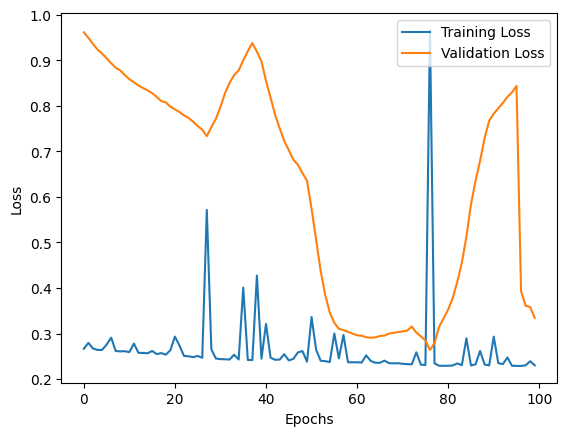

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model_final.predict([xtest_FD_squeezed, xtest_TD_squeezed])
prediction = np.argmax(predictions, axis=1)
print(predictions)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[[1.5548895e-01 8.4451115e-01]
 [9.9556994e-01 4.4299904e-03]
 [9.9956101e-01 4.3896248e-04]
 [9.9999946e-01 5.2742263e-07]
 [9.9999994e-01 4.5104476e-09]
 [9.9858308e-01 1.4169053e-03]
 [9.9999470e-01 5.1925240e-06]
 [9.9995679e-01 4.3154068e-05]
 [9.9999523e-01 4.7679896e-06]]
[1 0 0 0 0 0 0 0 0]


In [ ]:
model_final.save_weights("model_weights1new1.weights.h5")